In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from util import *

# Load data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

X = mnist.train._images.reshape(55000,28,28)
Y = mnist.train._labels
index = np.arange(55000)
np.random.shuffle(index)

train_bf = BatchFeeder(X[index[:54000]], Y[index[:54000]], 128)
valid_bf = BatchFeeder(X[index[54000:]], Y[index[54000:]], 32)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Train model

In [3]:
model = testnet()

In [4]:
model.train(train_bf, 5)

Epoch:1
Epoch:2
Epoch:3
Epoch:4
Epoch:5


# Explain it

Truth: 2
Prediction: 2


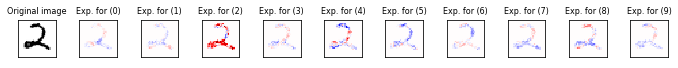

In [13]:
x, y = valid_bf.next()
pred = model.predict(x)
ex = model.explain(x)

index = 0

print "Truth:", np.argmax(y[index])
print "Prediction:", np.argmax(pred[index])

# Plot the true image.
plt.figure(figsize=(9.5,1))
plt.subplot(1,11,1)
plt.imshow(x[index].reshape(28,28), cmap="Greys")
plt.xticks([],[])
plt.yticks([],[])
plt.title("Original image", fontsize=8)

# Generate explanation with respect to each of 10 output channels.
exs = []
for i in range(10):
    exs.append(ex[i][index].reshape(28, 28))
exs = np.array(exs)

# Plot them
th = max(np.abs(np.min(exs)), np.abs(np.max(exs)))
for i in range(1,11):
    e = exs[i-1]
    plt.subplot(1,11,1+i)
    plt.imshow(e, cmap="seismic", vmin=-1*th, vmax=th)
    plt.xticks([],[])
    plt.yticks([],[])
    plt.title("Exp. for ("+str(i-1)+")", fontsize=8)
plt.tight_layout()
plt.show()